# X-ray luminosity functions of Clusters and AGN in the ERASS survey

Import the necessary packages and functions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
sys.path.append('../../')
from scripts.luminosity_functions import def_agn_xlf, def_clusters_xlf
from scripts.forecast import dNdz_photo_z, make_photoz_bin_edges
from scripts.utils import set_mpl, path2plots
set_mpl()

## Distribution of Clusters and AGN  in redshift

Instantiate the classes, calculate distributions

In [10]:
zarr = np.linspace(0.05, 3.5, 500)

xlf_soft=def_agn_xlf
density_multiplier = 1.3
_, dndz_agn = xlf_soft.dNdz(Slim = 1e-14, zarr = zarr)
dndz_agn *= density_multiplier


zarr_clu = np.linspace(0.01, 1, 500)
clusters_xlf = def_clusters_xlf
_, dndz_clu = clusters_xlf.dNdz(zarr = zarr_clu, Slim = 4.4e-14, M_min=5e13)


_, b_eff_agn = xlf_soft.b_eff(zarr)

_, b_eff_clu = clusters_xlf.b_eff(zarr_clu, Slim = 4.4e-14, M_min = 5e13, M_max = 2e15)



### Number of clusters and AGN and clusters

In [11]:
tot_agn = xlf_soft.logNlogS(Sarr = [1e-14])[1][0]*density_multiplier*41253.0*0.658
print(f'TOTAL NUMBER OF AGN IN 65.8% of SKY: {tot_agn:.0f}')

tot_agn = xlf_soft.logNlogS(Sarr = [1e-14], zmin = 0.5, zmax = 2.5)[1][0]*density_multiplier*41253.0*0.658
print(f'TOTAL NUMBER OF AGN (0.5<z<2.5) IN 65.8% of SKY: {tot_agn:.0f}')


tot_agn = xlf_soft.logNlogS(Sarr = [1e-14], zmax = 0.5)[1][0]*density_multiplier*41253.0*0.658
print(f'TOTAL NUMBER OF AGN (z<0.5) IN 65.8% of SKY: {tot_agn:.0f}')

TOTAL NUMBER OF AGN IN 65.8% of SKY: 2450941
TOTAL NUMBER OF AGN (0.5<z<2.5) IN 65.8% of SKY: 1969866
TOTAL NUMBER OF AGN (z<0.5) IN 65.8% of SKY: 405547


In [12]:

tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=5e13)[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h): {tot_clu:.0f}')


tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=5e13, zarr = np.linspace(0.05,1, 100))[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h, z<=1): {tot_clu:.0f}')

tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=5e13, zarr = np.linspace(1,2, 100))[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h, z>=1): {tot_clu:.0f}')



tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=1e14)[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=1e14 Msun/h): {tot_clu:.0f}')

tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=3e14)[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=3e14 Msun/h): {tot_clu:.0f}')

tot_clu = clusters_xlf.logNlogS(Sarr = np.array([4.4e-14]), M_min=10e14)[1][0]*41253.0*0.658
print(f'TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>1e15 Msun/h): {tot_clu:.0f}')

TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h): 93394
TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h, z<=1): 92489
TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=5e13 Msun/h, z>=1): 895
TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=1e14 Msun/h): 52218
TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>=3e14 Msun/h): 3106
TOTAL NUMBER OF CLUSTERS IN 65.8% of SKY (M>1e15 Msun/h): 13


### Plot distributions and biases

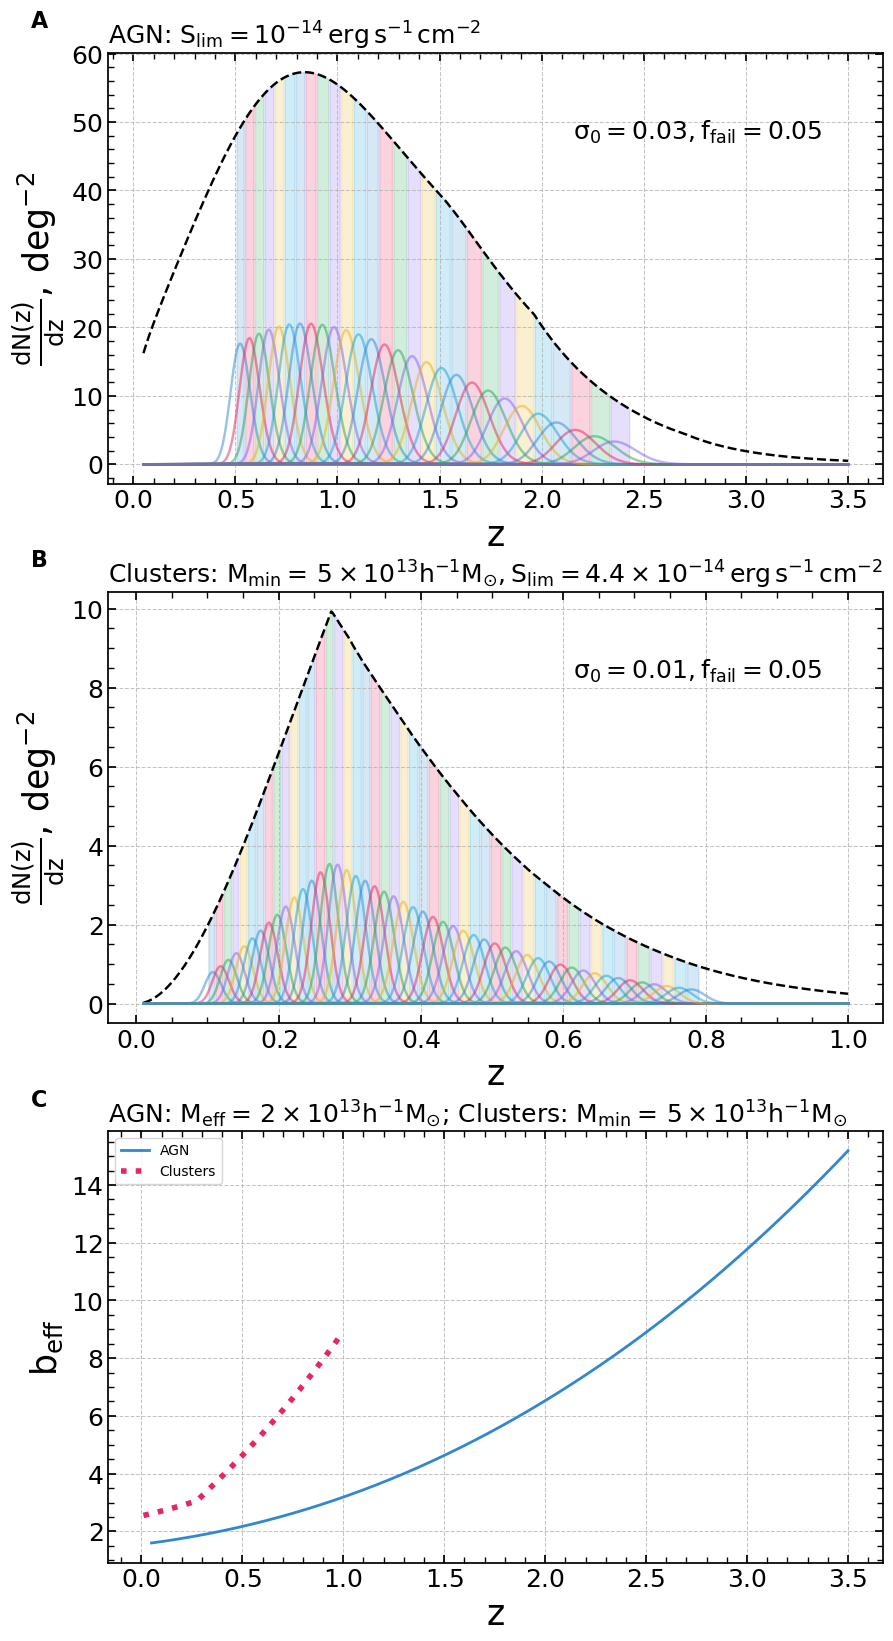

In [17]:
fig = plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.25)
fontsize_title = 18
rows, cols = 3, 1
#(rows,cols), (y,x) <- those are coordinates of an axis in subplots
ax_dndz_agn = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
ax_dndz_clu = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1)
ax_bias = plt.subplot2grid((rows, cols), (2, 0), rowspan=1, colspan=1)

ax_dndz_agn.plot(zarr, dndz_agn, 'k--')

ph_pars_agn = (0.03, 0.05)

bin_left_edges = make_photoz_bin_edges(0.5, 2.5,k = 1, sigma_0=ph_pars_agn[0])
for jj in range(len(bin_left_edges)-2):
        zmin, zmax = bin_left_edges[jj], bin_left_edges[jj+1]

        zarr_ph, dndz_phot, _, _ = dNdz_photo_z(zarr = zarr, dNdz= dndz_agn, zmin = zmin, zmax = zmax, f_fail =ph_pars_agn[1], sigma_0=ph_pars_agn[0])
        ax_dndz_agn.plot(zarr_ph, dndz_phot, alpha = 0.5)
        color =  ax_dndz_agn.get_lines()[-1].get_color()
        ax_dndz_agn.fill_between(zarr_ph, dndz_agn, alpha=0.2, color=color, where = (zarr_ph>zmin) & (zarr_ph<zmax))
        #axs[ii].axvspan(zmin, zmax, color=color, alpha=0.25)

ax_dndz_agn.set_title(rf'AGN: $\rm S_{{lim}} = 10^{{-14}}\, erg\,s^{{-1}}\,cm^{{-2}}$ ', fontsize = fontsize_title)
ax_dndz_agn.text(0.6, 0.8, rf'$\rm \sigma_0 = {ph_pars_agn[0]}, f_{{fail}}={ph_pars_agn[1]} $', fontsize = fontsize_title, transform=ax_dndz_agn.transAxes)



ax_dndz_clu.plot(zarr_clu, dndz_clu, 'k--')
ph_pars_clu = (0.01, 0.05)

bin_left_edges = make_photoz_bin_edges(0.1, 0.8,k = 1, sigma_0=ph_pars_clu[0])
for jj in range(len(bin_left_edges)-2):
        zmin, zmax = bin_left_edges[jj], bin_left_edges[jj+1]

        zarr_ph, dndz_phot, _, _ = dNdz_photo_z(zarr = zarr_clu, dNdz= dndz_clu, zmin = zmin, zmax = zmax, f_fail =ph_pars_clu[1], sigma_0=ph_pars_clu[0])
        ax_dndz_clu.plot(zarr_ph, dndz_phot, alpha = 0.5)
        color =  ax_dndz_clu.get_lines()[-1].get_color()
        ax_dndz_clu.fill_between(zarr_clu, dndz_clu, alpha=0.2, color=color, where = (zarr_clu>zmin) & (zarr_clu<zmax))
        #axs[ii].axvspan(zmin, zmax, color=color, alpha=0.25)



ax_dndz_clu.set_title(rf'Clusters: $\rm M_{{min}} = \, 5\times 10^{{13}} h^{{-1}}M_{{\odot}}, S_{{lim}} = 4.4\times 10^{{-14}}\, erg\,s^{{-1}}\,cm^{{-2}}$', fontsize = fontsize_title)
ax_dndz_clu.text(0.6, 0.8, rf'$\rm \sigma_0 = {ph_pars_clu[0]}, f_{{fail}}={ph_pars_clu[1]} $', fontsize = fontsize_title, transform=ax_dndz_clu.transAxes)


for ax in [ax_dndz_agn, ax_dndz_clu]:
    ax.set_xlabel(r'$\rm z$')
    ax.set_ylabel(r'$\rm \frac{dN(z)}{dz},\, deg^{-2}$')



ax_bias.plot(zarr, b_eff_agn, color = 'C0',lw = 2, label = 'AGN')
ax_bias.plot(zarr_clu, b_eff_clu, lw = 4, color = 'C1', ls = ':', label = 'Clusters')

ax_bias.set_xlabel(r'$\rm z$')
ax_bias.set_ylabel(r'$\rm b_{eff}$')
ax_bias.legend(fontsize = 10)


ax_bias.set_title(rf"AGN: $\rm M_{{eff}} = \, 2\times 10^{{13}} h^{{-1}}M_{{\odot}}$; Clusters: $\rm M_{{min}} = \, 5\times 10^{{13}} h^{{-1}}M_{{\odot}}$", fontsize = fontsize_title,)

for ax, letter in zip([ax_dndz_agn, ax_dndz_clu, ax_bias], ['A', 'B', 'C']):
    ax.text(-0.1, 1.1, letter, transform=ax.transAxes, fontsize=16,
            verticalalignment='top', fontweight='bold',)

fig.savefig(path2plots+'dndzs.pdf')

### photo-z bin dilution

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


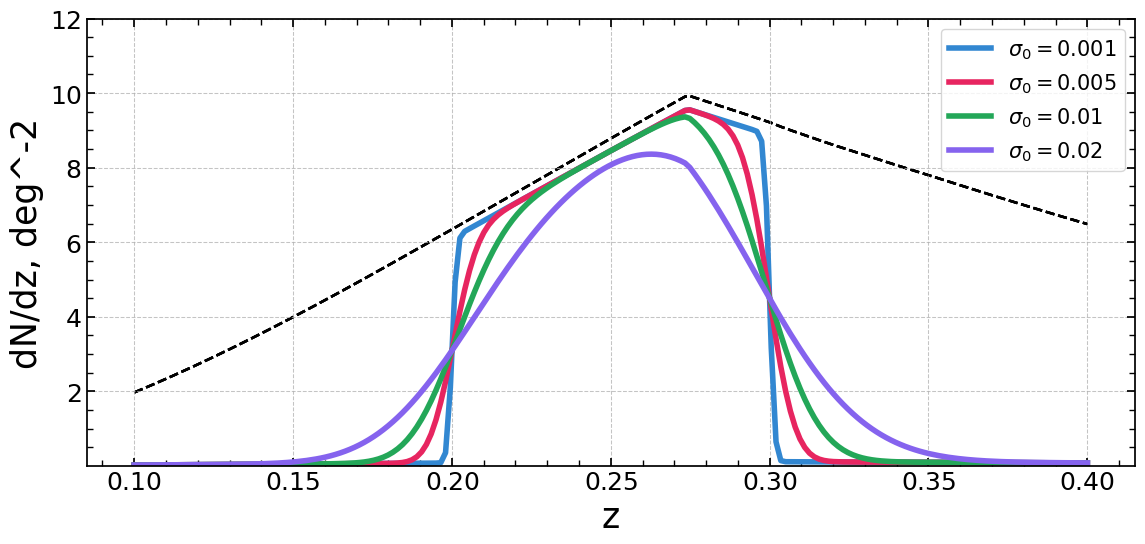

In [6]:
zarr = np.linspace(0.1, 0.4, 200)
zarr, dndz = clusters_xlf.dNdz(Slim = 4.4e-14, zarr = zarr);

bin_left_edges = np.array([0.2, 0.3, 0.4])
sigmas =  1e-3, 5e-3, 1e-2, 2e-2
f_fail = 0.05
fig, ax = plt.subplots(figsize=(12,6))


for ii, sigma0 in enumerate(sigmas):
    for jj in range(len(bin_left_edges)-2):
        zmin, zmax = bin_left_edges[jj], bin_left_edges[jj+1]
        zarr_ph, dndz_phot, _, _ = dNdz_photo_z(zarr = zarr, dNdz= dndz, zmin = zmin, zmax = zmax, f_fail =f_fail, sigma_0=sigma0)
        ax.plot(zarr_ph, dndz_phot, lw = 4, label=f'$\sigma_0=${sigma0}')

    ax.plot(zarr, dndz, 'k--', zorder = -2)
ax.set_xlabel('z')
ax.set_ylabel('dN/dz, deg^-2')

ax.legend(fontsize = 15)
ax.set_ylim(1e-2, 12)
plt.tight_layout()

fig.savefig('./plots/CLUSTERS_photo_z.png')